# Function for Plotting

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from opfunu import cec_based
from ipywidgets import interact

In [2]:
def Plot_Min50Max(Dataset_Results):
    plot = sns.scatterplot(Dataset_Results.describe().loc[['min','50%','max']].T)
    plot.set_title(Dataset_Results.__name__)
    plot.set_xlabel('Generation')
    plot.set_ylabel('Function Value')

In [3]:
def Plot_Generation_FunctionValues(Dataset_Results):
    fig , axes = plt.subplots(figsize=(10,6))
    for generation in Dataset_Results.columns:
        sns.scatterplot(x=generation,y=Dataset_Results[generation],color='red',alpha=0.005,ax=axes)
    axes.set_title(Dataset_Results.__name__)
    axes.set_xlabel('Generation')
    axes.set_ylabel('Function Value')

In [4]:
def InteractivePlot(Dataset_Results):
    def PlotFunctionValue(generation):
        fig , axes = plt.subplots()
        sns.histplot(x=Dataset_Results[generation],bins=50,color='gray',ax=axes)
        axes.set_title(Dataset_Results.__name__)
        axes.set_xlabel('Function Value')
        axes.axvline(Dataset_Results[generation].mean(),ls=':',color='red',label='Mean')
        axes.axvline(Dataset_Results[generation].median(),ls=':',color='blue',label='Median')
        fig.legend()

    interact(PlotFunctionValue,generation=(0,len(Dataset_Results.columns)-1,1))

# Time Execution

In [135]:
TimeExecution = pd.read_csv('./Dim_2/TimeExecution_Results.csv',index_col=0)

In [136]:
TimeExecution # Time in seconds

,Base,RandomSample,Agglomerative,RandomParameters
F1,12.146414,18.868851,9.645253,9.153826
F2,9.860910,17.219354,11.541068,11.180574
F3,13.242429,20.453842,13.246447,12.905626
F4,11.343526,18.102936,11.492209,11.680597
F5,9.559351,15.580622,10.078485,9.434922
F6,16.615558,25.729958,18.791724,17.767607
F7,34.656600,39.287127,32.476375,31.886522
F8,19.373604,25.571104,18.655575,17.908729
F9,28.447329,35.343001,28.649424,27.512666
F20,40.467459,47.631056,41.488745,41.404047


In [137]:
TimeExecution.T.describe().loc[['mean','std','50%']]

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F20,F21,F22,F23,F24,F25,F26,F27
mean,12.453586,12.450477,14.962086,13.154817,11.163345,19.726212,34.576656,20.377253,29.988105,42.747827,57.187649,68.05476,52.533366,62.215497,91.397048,95.679142,85.302368
std,4.473072,3.260252,3.664653,3.301628,2.958012,4.100021,3.358717,3.513838,3.604107,3.288213,3.283130,3.61836,4.612792,4.824688,4.243612,3.827679,3.369479
50%,10.895833,11.360821,13.244438,11.586403,9.818918,18.279665,33.566487,19.014589,28.548377,41.446396,55.877493,66.62963,50.279896,60.065358,89.703310,93.997791,83.897949


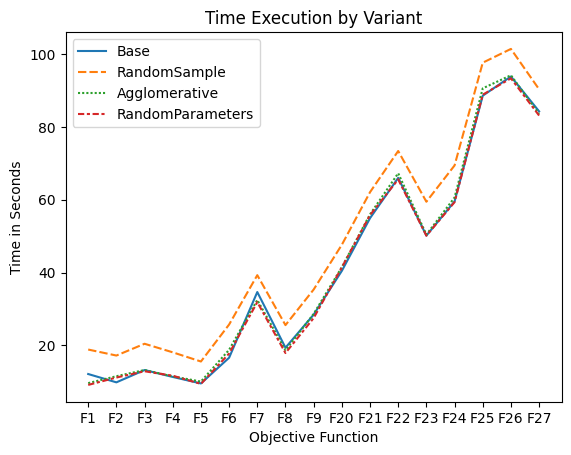

In [149]:
plot = sns.lineplot(data=TimeExecution)
plot.set_title('Time Execution by Variant')
plot.set_xlabel('Objective Function')
plot.set_ylabel('Time in Seconds');

In [154]:
TimeExecution[['Base','Agglomerative','RandomParameters']].T.describe().loc[['mean','std','50%']]

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F20,F21,F22,F23,F24,F25,F26,F27
mean,10.315164,10.860851,13.131501,11.505444,9.690919,17.724963,33.006499,18.645969,28.203140,41.120084,55.561919,66.281260,50.227897,59.819419,89.322762,93.773164,83.634306
std,1.604831,0.884534,0.195624,0.168925,0.341359,1.088709,1.459146,0.732484,0.606446,0.566774,0.557164,0.875763,0.160112,0.685043,1.093804,0.424463,0.579223
50%,9.645253,11.180574,13.242429,11.492209,9.559351,17.767607,32.476375,18.655575,28.447329,41.404047,55.769464,65.994904,50.147516,59.528865,88.830409,93.828094,83.541613


# Function 9

In [8]:
NumberFunction = '9'

## Function Plot

In [9]:
ObjectiveFunction = cec_based.__dict__[f'F{NumberFunction}2017']

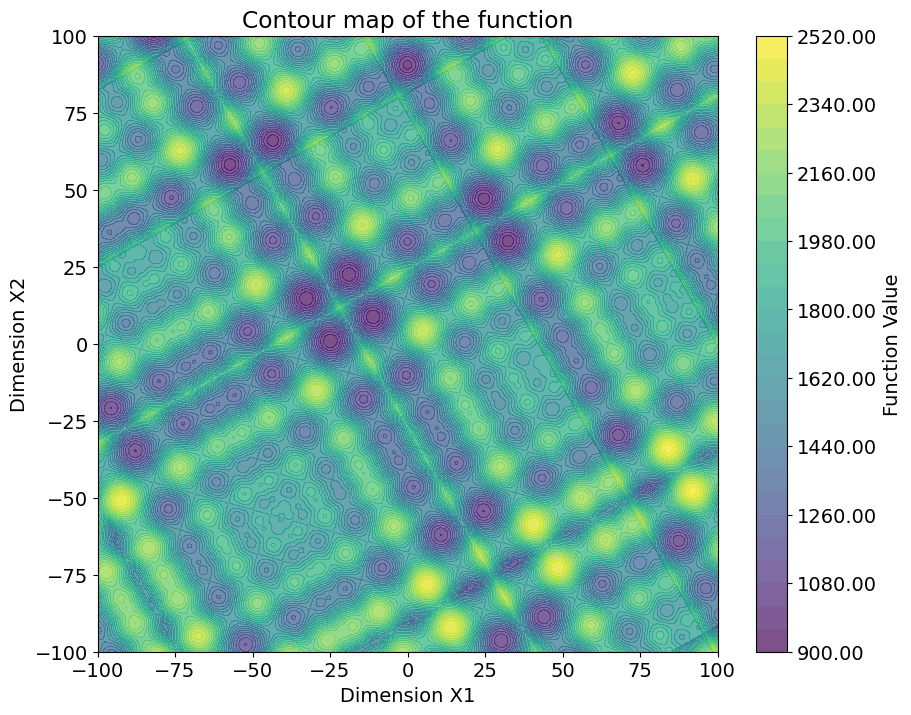

In [10]:
ObjectiveFunction(ndim=2).plot_2d(500)

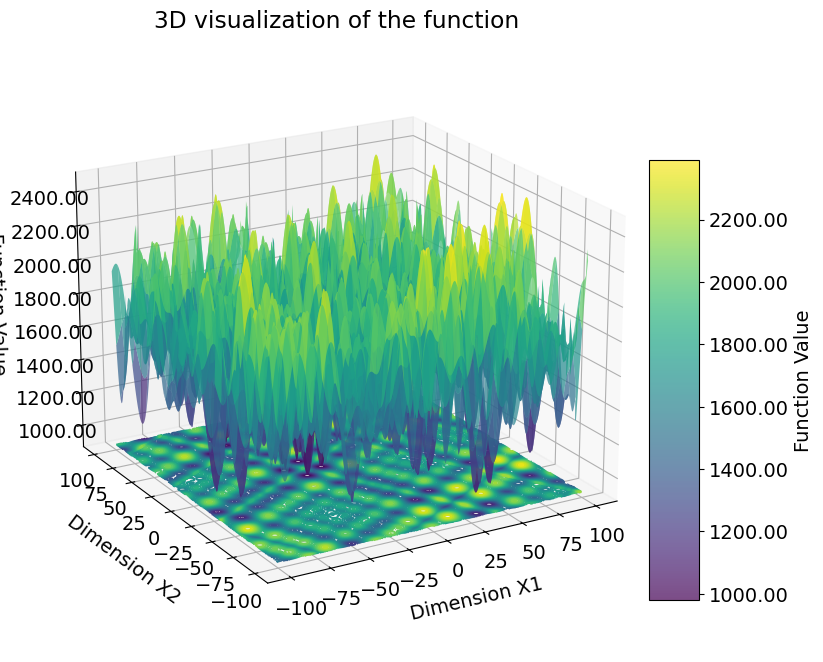

In [11]:
ObjectiveFunction(ndim=2).plot_3d(500)

## Base

In [25]:
Base = pd.read_csv(f'./Dim_2/Base/Optimals_F{NumberFunction}.csv',index_col=None,header=None)
Base.__name__ = f'F{NumberFunction} Base'
Base.head(10)

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,1132.505601,933.774637,933.774637,933.774637,933.774637,933.774637,933.774637,933.774637,933.774637,933.774637,...,903.819502,903.819502,903.819502,903.819502,903.819502,903.819502,903.819502,903.819502,903.819502,903.819502
1,948.840393,948.840393,948.840393,948.840393,948.840393,947.888463,947.888463,947.888463,947.888463,947.888463,...,902.403941,902.403941,902.403941,902.403941,902.403941,902.403941,902.403941,902.403941,902.403941,902.403941
2,1125.011391,1125.011391,1100.315202,1030.499116,1030.499116,1029.827303,929.442612,929.442612,929.442612,929.442612,...,910.317473,910.317473,910.317473,910.317473,910.317473,910.317473,910.317473,910.317473,910.317473,910.317473
3,998.117018,998.117018,998.117018,973.210627,973.210627,973.210627,973.210627,973.210627,973.210627,973.210627,...,903.529482,903.529482,903.529482,903.529482,903.529482,903.529482,903.529482,903.529482,903.529482,903.529482
4,961.987637,961.987637,961.987637,961.987637,961.987637,961.987637,920.667239,920.667239,920.667239,920.667239,...,903.755899,903.755899,903.755899,903.755899,903.755899,903.755899,903.755899,903.755899,903.755899,901.762082
5,955.968214,912.285688,912.285688,912.285688,912.285688,912.285688,912.285688,912.285688,912.285688,912.285688,...,911.113142,911.113142,911.113142,911.113142,911.113142,911.113142,911.039504,911.039504,911.039504,911.039504
6,1043.658112,1043.658112,918.487992,918.487992,918.487992,918.487992,918.487992,918.487992,918.487992,905.074452,...,905.074452,905.074452,905.074452,905.074452,905.074452,905.074452,905.074452,905.074452,905.074452,905.074452
7,1101.495819,1101.495819,984.360244,984.360244,984.360244,984.360244,984.360244,984.360244,984.360244,966.075688,...,902.066367,902.066367,902.066367,902.066367,902.066367,902.066367,902.066367,902.066367,902.066367,902.066367
8,988.898689,988.898689,988.898689,971.787642,971.787642,948.069809,948.069809,948.069809,909.100872,909.100872,...,903.598687,903.598687,903.598687,903.598687,903.598687,903.598687,903.598687,903.598687,903.598687,903.598687
9,1012.542622,980.787206,980.787206,980.215462,980.215462,980.215462,980.215462,980.215462,920.325061,920.325061,...,901.796273,901.796273,901.796273,901.796273,901.796273,901.796273,901.796273,901.796273,901.796273,901.796273


In [13]:
Base.describe()

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1026.280862,981.980077,964.994683,953.510327,946.697389,940.986519,936.678705,931.836842,929.312947,926.733937,...,905.543384,905.385201,905.152570,905.001519,904.827975,904.657546,904.522066,904.427102,904.258391,904.122577
std,76.215663,55.114888,44.413507,37.581466,34.021471,30.663658,27.460348,23.820017,21.804465,20.192959,...,5.445952,5.304563,5.121166,4.961931,4.875001,4.726902,4.622544,4.524896,4.324569,4.250219
min,901.143757,900.026393,900.026393,900.026393,900.026393,900.026393,900.026393,900.026393,900.026393,900.024816,...,900.015037,900.002634,900.002634,900.002634,900.002634,900.002634,900.002634,900.002634,900.002634,900.002634
25%,963.169855,938.094634,931.253683,924.730188,921.569546,918.833111,917.345303,914.940804,913.778027,911.850927,...,901.669214,901.634038,901.567652,901.510200,901.445034,901.410844,901.387826,901.371103,901.344925,901.307693
50%,1019.127120,970.198103,957.398595,945.565675,939.364754,934.146738,930.144594,926.658748,924.432678,922.596538,...,903.582248,903.510777,903.425157,903.336007,903.222098,903.093568,902.983760,902.930394,902.848688,902.719816
75%,1080.025452,1017.998807,992.309151,974.290910,964.296573,957.591185,950.995958,943.503403,940.040476,936.745298,...,907.449238,907.189373,906.694982,906.566959,906.287850,905.987214,905.828907,905.725839,905.307202,905.083653
max,1262.846689,1192.549790,1118.947703,1106.380649,1084.679216,1084.679216,1053.146085,1053.146085,1026.403981,1026.403981,...,928.536747,928.536747,928.536747,928.536747,928.063859,928.023464,928.023464,928.023464,925.504755,925.504755


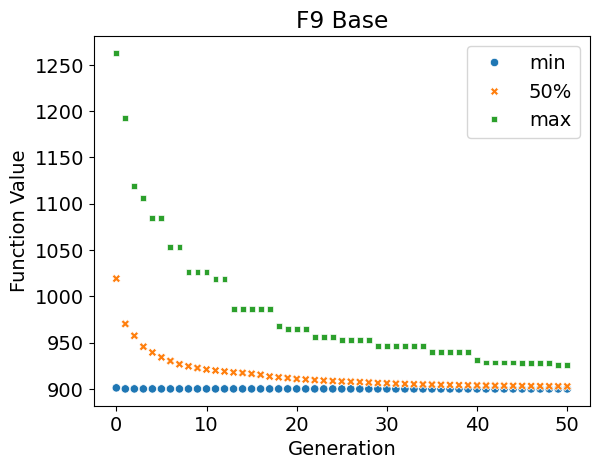

In [27]:
Plot_Min50Max(Base)

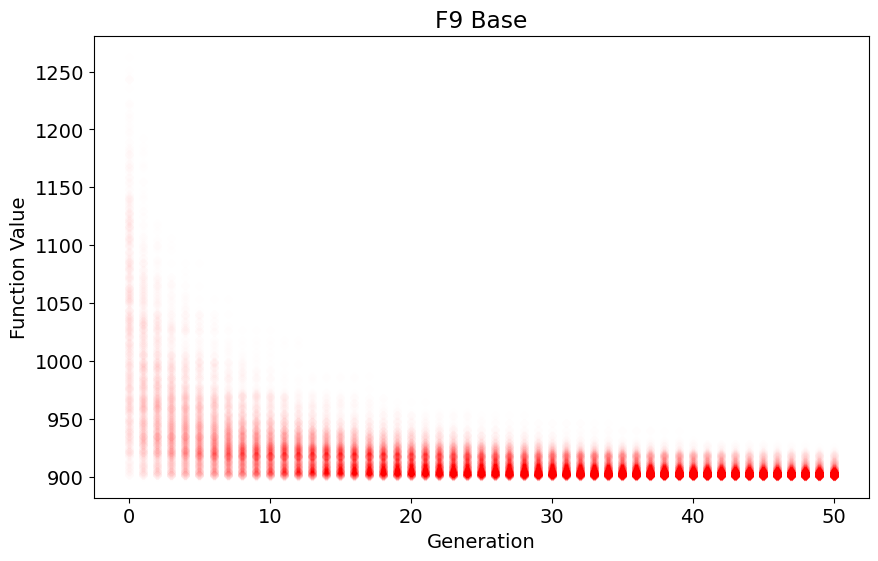

In [28]:
Plot_Generation_FunctionValues(Base)

In [29]:
InteractivePlot(Base)

interactive(children=(IntSlider(value=25, description='generation', max=50), Output()), _dom_classes=('widget-…

## Random Sample

In [30]:
RandomSample = pd.read_csv(f'./Dim_2/RandomSample/Optimals_F{NumberFunction}.csv',index_col=None,header=None)
RandomSample.__name__ = f'F{NumberFunction} Random Sample'
RandomSample.head(10)

,0,1,2,3,4,5,6,7,8,9,...,116,117,118,119,120,121,122,123,124,125
0,1203.922828,1022.081577,980.464034,980.464034,980.464034,980.464034,980.464034,980.464034,980.464034,939.804597,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,972.928684,972.928684,972.928684,972.928684,972.928684,949.159203,949.159203,949.159203,943.134132,943.134132,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,927.040012,927.040012,927.040012,927.040012,923.472476,923.472476,923.472476,923.472476,923.472476,923.472476,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1011.810493,1000.091767,981.600672,981.600672,981.600672,939.030042,920.852262,920.852262,920.852262,920.852262,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,968.632764,963.063390,911.518520,911.518520,911.518520,911.518520,911.518520,911.518520,911.518520,911.518520,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,997.883522,969.307494,969.307494,922.827068,922.827068,922.827068,922.827068,922.827068,922.827068,922.827068,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,969.878194,969.878194,969.878194,969.878194,969.878194,969.878194,969.878194,969.878194,969.878194,969.365429,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1053.467248,1053.467248,928.403282,928.403282,928.403282,928.403282,928.403282,928.403282,928.403282,928.403282,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,999.845474,936.449992,936.449992,933.877062,933.877062,933.877062,933.877062,933.877062,933.877062,933.877062,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1001.889997,977.336281,977.336281,977.336281,958.699243,958.699243,920.877198,920.877198,920.877198,920.877198,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
RandomSample.describe()

,0,1,2,3,4,5,6,7,8,9,...,116,117,118,119,120,121,122,123,124,125
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,32.000000,32.000000,32.000000,10.000000,10.000000,10.000000,10.000000,2.000000,2.000000,2.000000
mean,1026.997526,986.104627,965.532190,953.752877,946.351680,940.382721,935.889857,932.154583,929.491401,926.684601,...,902.048216,901.985371,901.980262,901.285170,901.221147,901.207461,901.191253,900.377360,900.377360,900.377360
std,77.429955,57.083481,45.669540,39.744062,34.579948,30.807372,27.821530,25.552511,24.009738,21.899922,...,4.182949,4.130714,4.132424,1.507742,1.517944,1.522856,1.530827,0.092188,0.092188,0.092188
min,900.966567,900.966567,900.828636,900.552662,900.346034,900.346034,900.346034,900.346034,900.026170,900.026170,...,900.000235,900.000152,900.000152,900.108389,900.108389,900.108389,900.108389,900.312173,900.312173,900.312173
25%,964.872606,938.889977,928.668074,921.820989,919.491138,917.402045,915.772677,912.819812,911.617877,910.457862,...,900.312913,900.312912,900.312912,900.312504,900.312504,900.312186,900.312186,900.344767,900.344767,900.344767
50%,1022.463833,976.811504,956.678802,944.096691,937.549393,933.628740,929.796358,926.228258,923.371904,921.558844,...,900.624348,900.624347,900.598932,900.658383,900.625405,900.625405,900.544366,900.377360,900.377360,900.377360
75%,1076.310489,1025.511899,995.028947,978.369088,965.750106,956.766612,949.398837,943.845479,940.436285,936.663484,...,901.508707,901.374389,901.374389,901.294493,901.001688,900.967790,900.967790,900.409953,900.409953,900.409953
max,1312.176979,1237.455367,1142.090093,1116.813182,1080.026373,1080.026373,1070.032195,1070.032195,1032.306583,1029.592267,...,921.405267,921.405267,921.405267,904.466326,904.466326,904.466326,904.466326,900.442547,900.442547,900.442547


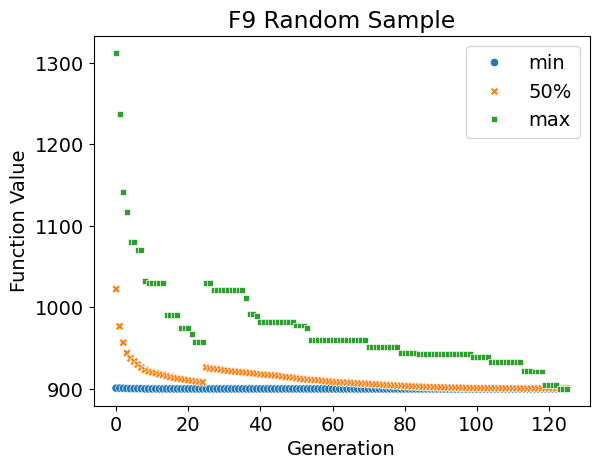

In [32]:
Plot_Min50Max(RandomSample)

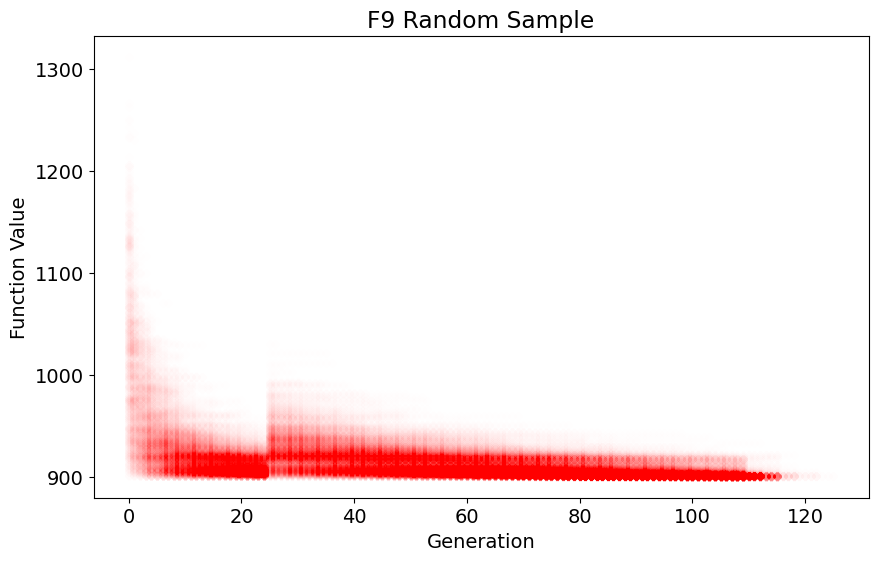

In [33]:
Plot_Generation_FunctionValues(RandomSample)

In [34]:
InteractivePlot(RandomSample)

interactive(children=(IntSlider(value=62, description='generation', max=125), Output()), _dom_classes=('widget…

## Agglomerative

In [35]:
Agglomerative = pd.read_csv(f'./Dim_2/Agglomerative/Optimals_F{NumberFunction}.csv',index_col=None,header=None)
Agglomerative.__name__ = f'F{NumberFunction} Agglomerative'
Agglomerative.head(10)

,0,1,2,3,4,5,6,7,8,9,...,184,185,186,187,188,189,190,191,192,193
0,926.680177,926.680177,926.680177,926.680177,906.761843,906.761843,906.761843,906.761843,906.761843,906.761843,...,900.000001,900.000001,900.000001,900.000001,900.000001,900.000001,900.000000,900.000000,900.000000,900.000000
1,922.188932,922.188932,922.188932,922.188932,922.188932,922.188932,922.188932,922.188932,922.188932,922.188932,...,901.137321,901.137321,901.137321,901.137321,901.137321,901.137321,901.137321,901.137321,901.137321,901.137321
2,1034.711927,1001.520647,1001.520647,1001.520647,936.887384,936.887384,936.887384,936.887384,936.887384,936.887384,...,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
3,1090.599393,906.774061,906.774061,906.774061,906.774061,906.774061,906.774061,906.774061,906.774061,906.774061,...,900.312173,900.312173,900.312173,900.312173,900.312173,900.312173,900.312173,900.312173,900.312173,900.312173
4,1012.580856,1012.580856,1012.580856,1012.580856,1012.580856,1012.580856,1012.580856,1012.580856,1012.580856,1012.580856,...,900.898677,900.898677,900.898677,900.779570,900.779570,900.779570,900.754891,900.671902,900.633516,900.633516
5,1007.643604,1007.643604,1007.643604,1002.578186,962.921116,962.921116,962.921116,962.921116,962.921116,919.297540,...,900.333848,900.192484,900.178000,900.178000,900.148453,900.110148,900.074743,900.065018,900.065018,900.065018
6,1061.157044,942.628480,942.628480,942.628480,942.628480,928.363589,928.363589,928.363589,928.363589,909.445207,...,900.312173,900.312173,900.312173,900.312173,900.312173,900.312173,900.312173,900.312173,900.312173,900.312173
7,1049.595360,1049.595360,1049.595360,1049.595360,1020.426060,1020.426060,1003.164201,1003.164201,1003.164201,1003.164201,...,900.329629,900.329571,900.329566,900.329505,900.329505,900.329505,900.329492,900.329492,900.329455,900.329412
8,1011.567447,976.817134,976.817134,938.623933,938.623933,938.623933,938.623933,938.623933,938.623933,938.623933,...,900.624347,900.624347,900.624347,900.624347,900.624347,900.624347,900.624347,900.624347,900.624347,900.624347
9,1018.123903,1018.123903,1018.123903,1016.001146,924.383066,924.383066,924.383066,924.383066,924.383066,924.383066,...,902.557526,902.557526,902.557526,902.557526,902.557526,902.557526,902.557526,902.557526,902.557526,902.557526


In [36]:
Agglomerative.describe()

,0,1,2,3,4,5,6,7,8,9,...,184,185,186,187,188,189,190,191,192,193
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1025.835859,982.257142,963.322102,952.429344,943.818512,938.143854,933.871877,930.361601,928.022226,925.738890,...,901.384412,901.365952,901.347656,901.331041,901.299519,901.291302,901.285108,901.277047,901.264811,901.264317
std,76.665806,55.417608,45.667689,38.703804,32.744766,28.999126,25.463587,23.272728,21.536094,20.029232,...,3.307257,3.262884,3.241355,3.232829,3.153782,3.152148,3.145090,3.139810,3.131292,3.131263
min,900.479663,900.479663,900.452135,900.452135,900.409834,900.409834,900.345435,900.345435,900.345435,900.345435,...,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
25%,960.922140,937.733589,927.891000,922.767276,919.796056,917.091941,914.649089,912.534452,911.388520,909.854846,...,900.312173,900.312173,900.312173,900.312173,900.312173,900.312173,900.312173,900.312173,900.312173,900.312173
50%,1022.179066,972.433856,952.519254,943.627790,936.907719,931.938182,928.694905,926.047793,923.903374,921.921381,...,900.312179,900.312177,900.312175,900.312174,900.312174,900.312174,900.312173,900.312173,900.312173,900.312173
75%,1079.023796,1022.469665,988.612057,972.941329,960.895828,952.300341,947.485566,942.054161,938.888896,935.453572,...,900.624351,900.624348,900.624347,900.624347,900.624347,900.624347,900.624347,900.624347,900.624347,900.624347
max,1262.855520,1166.786355,1131.692091,1131.692091,1074.953252,1071.999414,1041.108206,1032.168024,1032.168024,1018.192839,...,922.948501,922.948501,922.948501,922.948501,921.783253,921.783253,921.783253,921.783253,921.783253,921.783253


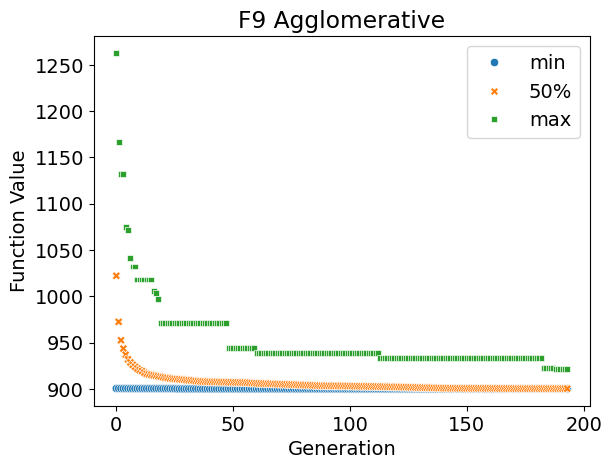

In [37]:
Plot_Min50Max(Agglomerative)

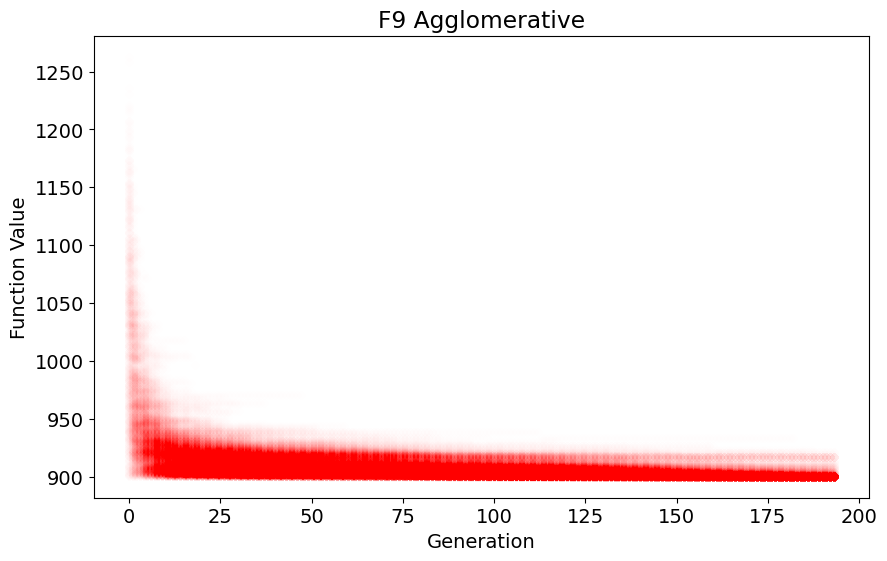

In [38]:
Plot_Generation_FunctionValues(Agglomerative)

In [39]:
InteractivePlot(Agglomerative)

interactive(children=(IntSlider(value=96, description='generation', max=193), Output()), _dom_classes=('widget…

## Random Parameters

In [40]:
RandomParameters = pd.read_csv(f'./Dim_2/RandomParameters/Optimals_F{NumberFunction}.csv',index_col=None,header=None)
RandomParameters.__name__ = f'F{NumberFunction} Random Parameters'
RandomParameters.head(10)

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,997.276127,997.276127,967.138090,967.138090,967.138090,967.138090,967.138090,967.138090,947.315778,947.315778,...,901.707050,901.707050,901.707050,901.707050,901.707050,901.707050,901.707050,901.707050,901.707050,901.707050
1,1041.133374,1041.133374,970.176234,970.176234,970.176234,970.176234,970.176234,970.176234,970.176234,970.176234,...,904.915137,904.915137,904.851186,904.851186,904.851186,904.851186,904.851186,904.851186,904.851186,904.851186
2,936.307781,936.307781,936.307781,936.307781,936.307781,936.307781,936.307781,936.307781,936.307781,936.307781,...,911.984282,911.984282,911.984282,911.984282,911.984282,911.984282,911.984282,911.984282,911.984282,911.919239
3,1140.997027,1140.997027,1046.977788,908.746227,908.746227,908.746227,908.746227,908.746227,908.746227,908.746227,...,908.746227,908.746227,904.857010,904.857010,904.857010,904.857010,904.857010,904.857010,904.857010,904.857010
4,1055.817988,1055.817988,1015.298281,1015.298281,926.173699,926.173699,926.173699,926.173699,926.173699,926.173699,...,912.317701,912.317701,901.068947,901.068947,901.068947,901.068947,901.068947,901.068947,901.068947,901.068947
5,1099.719379,1059.549379,1026.347907,1026.347907,926.614295,926.614295,926.614295,926.614295,926.614295,926.614295,...,901.507625,901.507625,901.507625,901.507625,901.507625,901.507625,901.507625,901.507625,901.507625,901.507625
6,934.543530,934.543530,934.543530,934.543530,934.543530,934.543530,934.543530,934.543530,930.235956,925.759394,...,900.752372,900.752372,900.752372,900.752372,900.752372,900.752372,900.752372,900.752372,900.752372,900.752372
7,924.640073,924.640073,924.640073,924.640073,924.640073,924.640073,924.640073,924.640073,924.640073,924.640073,...,918.052154,918.052154,918.052154,918.052154,918.052154,918.052154,918.052154,918.052154,918.052154,918.052154
8,1147.447615,946.981992,946.981992,946.981992,946.981992,946.981992,946.981992,946.981992,909.936711,909.936711,...,903.751270,903.751270,903.751270,903.751270,903.751270,903.751270,903.751270,903.751270,903.751270,903.751270
9,1148.995742,1086.951514,1030.605885,1030.605885,907.835291,907.835291,907.835291,907.835291,907.835291,907.835291,...,906.162520,906.162520,906.162520,906.162520,906.162520,906.162520,906.162520,906.162520,906.162520,906.162520


In [41]:
RandomParameters.describe()

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1023.006119,984.662112,965.712671,954.738740,946.660577,940.425033,935.431729,931.829667,928.861076,926.237867,...,905.096575,904.917462,904.753150,904.543937,904.356079,904.273725,904.141864,903.989928,903.892084,903.730767
std,75.830133,57.946911,45.271341,39.523382,34.329985,29.733011,26.305767,23.595145,22.316251,20.791207,...,5.000370,4.836829,4.711451,4.505193,4.302480,4.263439,4.097776,4.028827,3.945023,3.818559
min,900.624531,900.256957,900.256957,900.256957,900.256957,900.256957,900.256957,900.180962,900.180962,900.180962,...,900.023970,900.023970,900.023970,900.023970,900.023970,900.023970,900.023970,900.023970,900.022090,900.022090
25%,961.428405,938.259191,929.813886,924.223074,920.578198,918.389439,916.692780,914.368015,911.859513,909.870141,...,901.541472,901.462565,901.406068,901.352079,901.296704,901.240463,901.221976,901.183331,901.161706,901.121334
50%,1016.482056,972.806888,957.345283,944.994884,938.861193,933.798001,929.533095,926.730410,924.270125,921.961335,...,903.416921,903.263369,903.115708,902.985829,902.849577,902.745106,902.645257,902.539270,902.473005,902.301435
75%,1073.403977,1022.025661,993.022816,975.754431,965.279542,957.788069,950.400204,945.170238,940.179292,936.321534,...,906.991274,906.872908,906.448702,906.061380,905.942875,905.865931,905.659698,905.399453,905.220047,904.960566
max,1287.540027,1223.486286,1144.452687,1126.300811,1079.040687,1051.147616,1051.147616,1029.260303,1014.436440,1009.161297,...,927.249369,927.249369,927.249369,927.249369,926.968803,924.418329,924.418329,924.418329,924.418329,924.418329


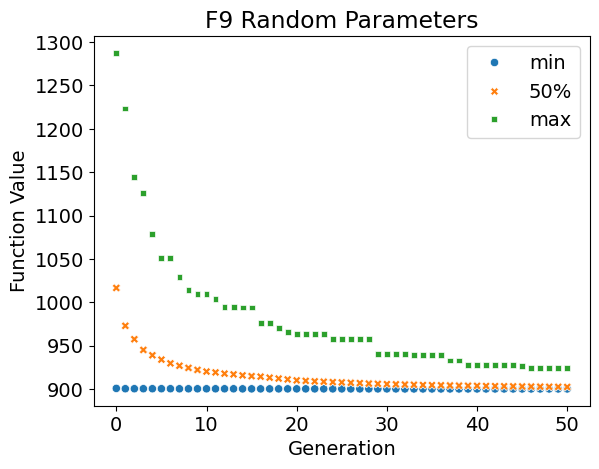

In [42]:
Plot_Min50Max(RandomParameters)

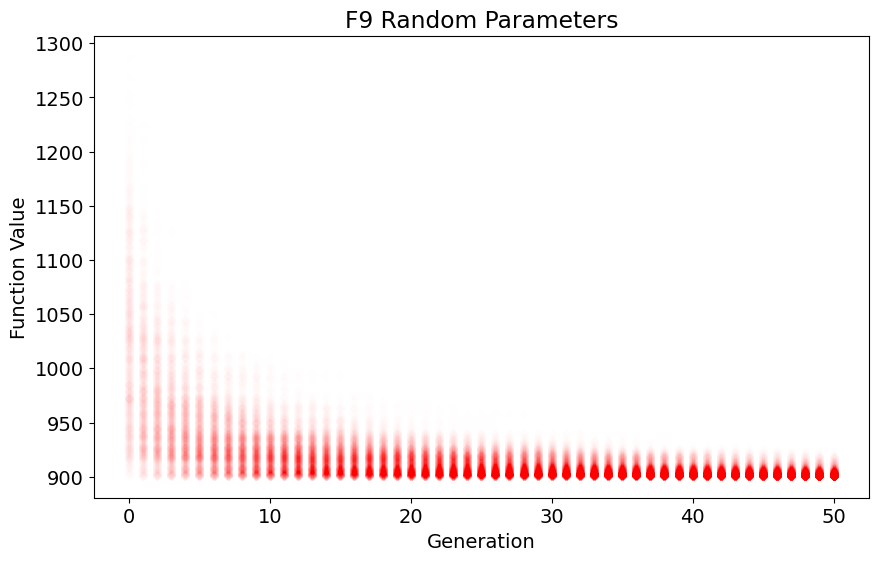

In [43]:
Plot_Generation_FunctionValues(RandomParameters)

In [44]:
InteractivePlot(RandomParameters)

interactive(children=(IntSlider(value=25, description='generation', max=50), Output()), _dom_classes=('widget-…